In [1]:
import pandas as pd
import numpy as np

In [2]:
fashion_train_df = pd.read_csv('fashion_minst/fashion-mnist_train.csv', sep=',')
fashion_test_df = pd.read_csv('fashion_minst/fashion-mnist_test.csv', sep=',')

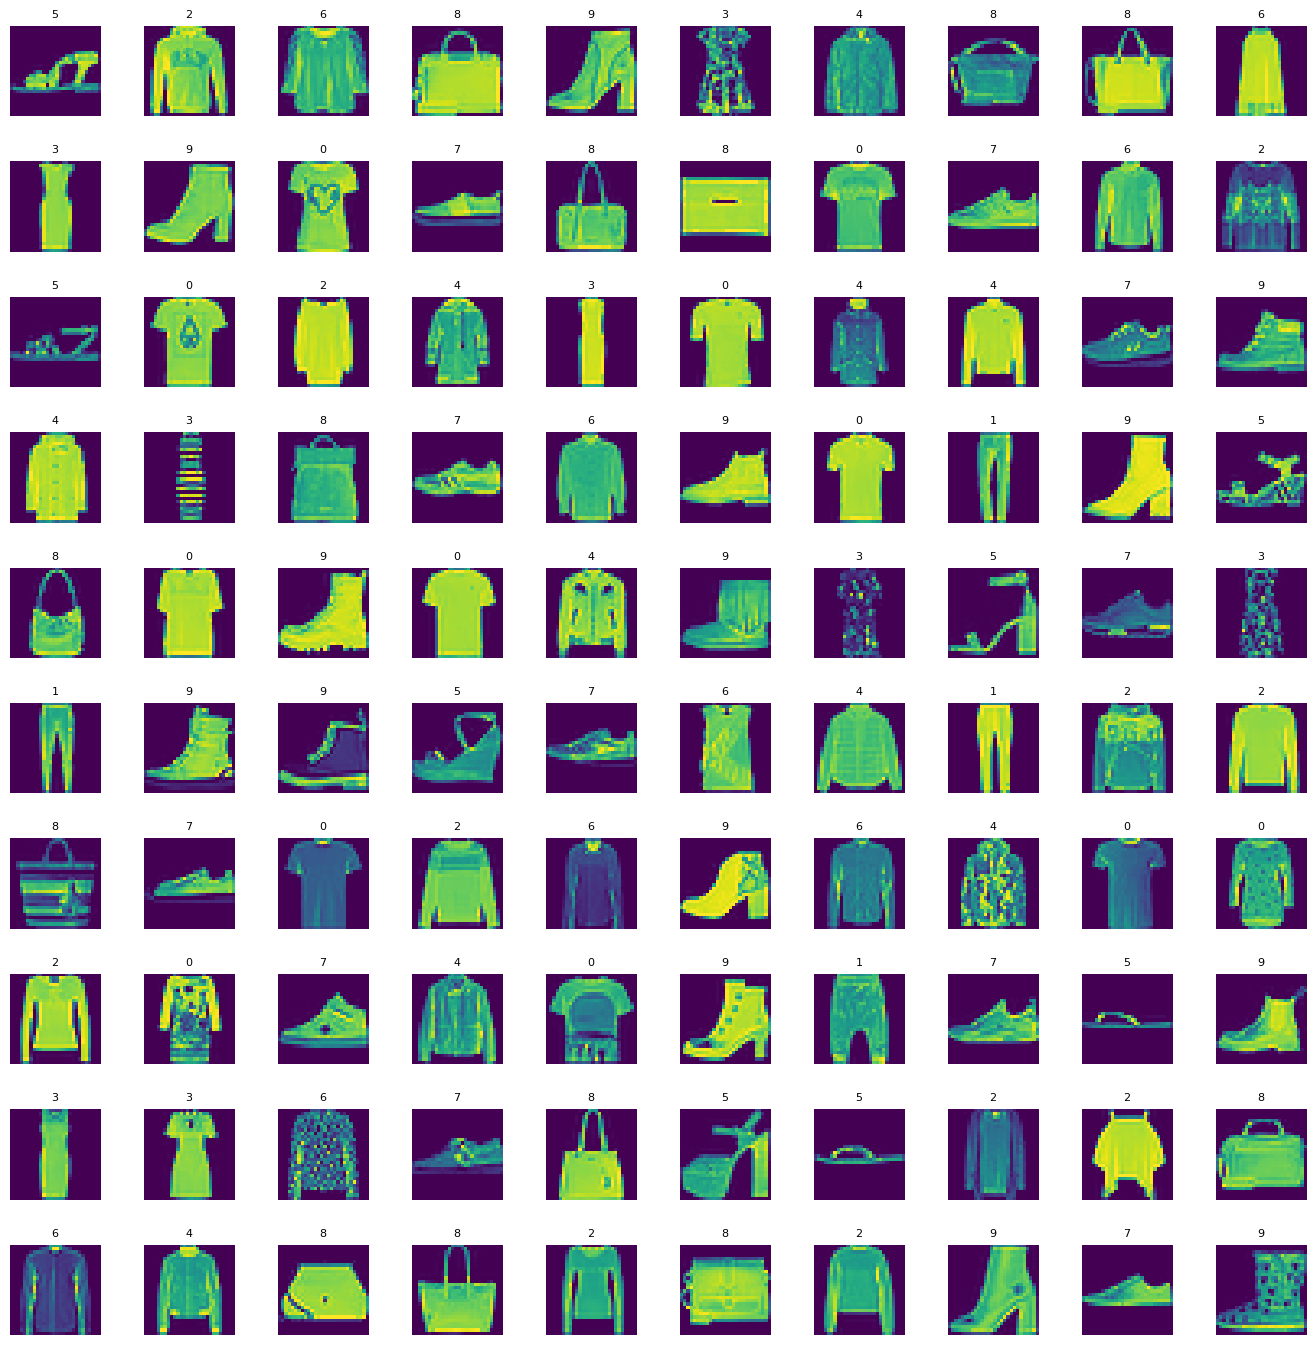

In [3]:
import matplotlib.pyplot as plt
import seaborn as sbn

training = np.asarray(fashion_train_df, dtype='float32')

height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [4]:
from sklearn.model_selection import train_test_split
training = np.asarray(fashion_train_df, dtype='float32')
X_train = training[:, 1:].reshape([-1,28,28,1])
X_train = X_train/255   
y_train = training[:, 0]

testing = np.asarray(fashion_test_df, dtype='float32')
X_test = testing[:, 1:].reshape([-1,28,28,1])
X_test = X_test/255    
y_test = testing[:, 0]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=5) 

In [6]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras.utils import to_categorical

2023-05-28 00:09:20.144209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 00:09:20.598273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-28 00:09:20.606743: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-28 00:09:23.615648: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2)))
cnn_model.add(Dropout(rate=0.3))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=32, activation='relu'))
cnn_model.add(Dense(units=10, activation='sigmoid'))

In [8]:
cnn_model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 64)        0         
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32)                346144    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                        

/home/ksr/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
cnn_model.fit(x=X_train, y=y_train, batch_size=512, epochs=100, validation_data=(X_val, y_val))

2023-05-28 00:11:21.649432: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


Epoch 1/100


2023-05-28 00:11:23.155653: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 88604672 exceeds 10% of free system memory.
2023-05-28 00:11:23.445403: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.
2023-05-28 00:11:23.500425: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.
2023-05-28 00:11:23.513837: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 22151168 exceeds 10% of free system memory.


94/94 [==============================] - 36s 370ms/step - loss: 0.7287 - accuracy: 0.7509 - val_loss: 0.4668 - val_accuracy: 0.8334
Epoch 2/100
94/94 [==============================] - 26s 277ms/step - loss: 0.4273 - accuracy: 0.8498 - val_loss: 0.4013 - val_accuracy: 0.8602
Epoch 3/100
94/94 [==============================] - 32s 339ms/step - loss: 0.3821 - accuracy: 0.8667 - val_loss: 0.3875 - val_accuracy: 0.8637
Epoch 4/100
94/94 [==============================] - 31s 330ms/step - loss: 0.3553 - accuracy: 0.8752 - val_loss: 0.3537 - val_accuracy: 0.8744
Epoch 5/100
94/94 [==============================] - 31s 326ms/step - loss: 0.3360 - accuracy: 0.8819 - val_loss: 0.3354 - val_accuracy: 0.8824
Epoch 6/100
94/94 [==============================] - 28s 295ms/step - loss: 0.3197 - accuracy: 0.8882 - val_loss: 0.3318 - val_accuracy: 0.8832
Epoch 7/100
94/94 [==============================] - 27s 291ms/step - loss: 0.3043 - accuracy: 0.8930 - val_loss: 0.3194 - val_accuracy: 0.8868
Epoc

94/94 [==============================] - 32s 339ms/step - loss: 0.1233 - accuracy: 0.9551 - val_loss: 0.2732 - val_accuracy: 0.9146
Epoch 58/100
94/94 [==============================] - 27s 291ms/step - loss: 0.1214 - accuracy: 0.9557 - val_loss: 0.2696 - val_accuracy: 0.9147
Epoch 59/100
94/94 [==============================] - 36s 382ms/step - loss: 0.1180 - accuracy: 0.9565 - val_loss: 0.2749 - val_accuracy: 0.9142
Epoch 60/100
94/94 [==============================] - 25s 270ms/step - loss: 0.1158 - accuracy: 0.9572 - val_loss: 0.2761 - val_accuracy: 0.9132
Epoch 61/100
94/94 [==============================] - 26s 279ms/step - loss: 0.1175 - accuracy: 0.9571 - val_loss: 0.2755 - val_accuracy: 0.9145
Epoch 62/100
94/94 [==============================] - 33s 344ms/step - loss: 0.1120 - accuracy: 0.9591 - val_loss: 0.2767 - val_accuracy: 0.9160
Epoch 63/100
94/94 [==============================] - 32s 335ms/step - loss: 0.1123 - accuracy: 0.9592 - val_loss: 0.2751 - val_accuracy: 0.915

In [ ]:
eval_result = cnn_model.evaluate(X_test, y_test)

print("Accuracy :",(eval_result[1]))

In [ ]:
y_pred = cnn_model.predict(x=X_test)
y_pred[2].argmax()
y_pred = [pred.argmax() for pred in y_pred]

In [ ]:
height = 10
width = 10


fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(20,20))
axes = axes.ravel()


for i in range(0, height*width):
    index = np.random.randint(len(y_pred))
    axes[i].imshow(X_test[index].reshape((28,28)))
    axes[i].set_title("True Class : {:0.0f}\nPrediction : {:d}".format(y_test[index],y_pred[index]))
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.9, wspace=0.5)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,5))
sbn.heatmap(cm, annot=True)

In [ ]:
# Classification Report 
num_classes = 10
class_names = ["class {}".format(i) for i in range(num_classes)]
cr = classification_report(y_test, y_pred, target_names=class_names)
print(cr)